# Importing the libraries

In [7]:
from env import SimpleGridWorld

import numpy as np

# Creating the Environment

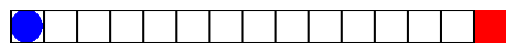

In [8]:
envSize = 15
env = SimpleGridWorld(size=envSize, start=0, end=envSize -1)
env.reset()
env.render()

# Creating the Q-value table

In [9]:
action_values = np.random.rand(envSize,2)

# Defining the policy

In [10]:
def policy(state, epsilon = 0.2):
    av = action_values[state]
    if np.random.random() < epsilon:
        return env.action_space.sample()
    else:
        return np.random.choice(np.flatnonzero(av == av.max()))    

# Implementing the algorithm

In [11]:
def Alpha_on_policy_MC_control(policy:callable, action_values, episodes = 10000, gamma = 0.99, epsilon = 0.2, alpha = 0.2):

    for episode in range(1, episodes + 1):
        trajectory = []
        state, _ = env.reset()
        done = False
        while not done:
            action = policy(state, epsilon)
            next_state, reward, done = env.step(action)
            trajectory.append([state, action, reward])
            state = next_state

        G = 0

        for state_t, action_t, reward_t in reversed(trajectory):
            G = reward_t + gamma * G
            qsa = action_values[state_t][action_t]    
            action_values[state_t][action_t] += alpha * (G - qsa) 

In [12]:
Alpha_on_policy_MC_control(policy, action_values=action_values)

KeyboardInterrupt: 

# Testing the Code

In [ ]:
env.test_agent(policy, 3)